### Importing needed libraries and connecting to the database

In [179]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import warnings
import plotly.express as px

warnings.filterwarnings("ignore")

In [2]:
connection_string = (
    "mssql+pyodbc://@KCLNK\\SQLEXPRESS/TransactionsDB"
    "?driver=ODBC+Driver+17+for+SQL+Server"
    "&trusted_connection=yes"
)

engine = create_engine(connection_string)

### Formatting output

In [79]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

### Grabbing the data from the database

In [4]:
transactions_df = pd.read_sql("SELECT * FROM enriched_final_transactions", engine)

In [5]:
users_df = pd.read_sql("SELECT * FROM Users", engine)
cards_df = pd.read_sql("SELECT * FROM Cards", engine)

In [6]:
transactions_df.head(10)

transaction_id    transaction_date    id  card_id  amount  \
0        15113549 2014-10-15 08:34:00   520     5104   35.04   
1        15113550 2014-10-15 08:34:00   727     4698    2.76   
2        15113552 2014-10-15 08:35:00   247     2179  112.92   
3        15113554 2014-10-15 08:35:00   534     3986   18.75   
4        15113555 2014-10-15 08:35:00  1096     5225   20.71   
5        15113557 2014-10-15 08:36:00   135     2808   31.89   
6        15113558 2014-10-15 08:36:00   623     2130 -364.00   
7        15113559 2014-10-15 08:36:00  1127     4641   14.68   
8        15113561 2014-10-15 08:37:00   277     4264    2.67   
9        15113562 2014-10-15 08:37:00   432     4301   67.00   

             use_chip  merchant_id merchant_city merchant_state     zip   mcc  \
0   Swipe Transaction        34490        Newark             DE   19702  5719   
1   Swipe Transaction        59935   Saint Louis             MO   63114  5499   
2   Swipe Transaction        38602  Lake Charles             LA   70606  5311   
3   Swipe Transaction        83271        Grimes             IA   50111  4214   
4   Swipe Transaction        50783      Syracuse             NY   13212  5411   
5  Online Transaction        39021        ONLINE         ONLINE  ONLINE  4784   
6   Swipe Transaction        51300    Wilmington             DE   19808  3359   
7   Swipe Transaction        50783        Naples             FL   34105  5411   
8   Swipe Transaction        61195       Grenada             MS   38901  5541   
9   Swipe Transaction        22204        Newton             NC   28658  5541   

     errors                          mcc_category fraud_label  
0  No Error  Miscellaneous Home Furnishing Stores        None  
1  No Error             Miscellaneous Food Stores       False  
2  No Error                     Department Stores       False  
3  No Error   Motor Freight Carriers and Trucking       False  
4  No Error          Grocery Stores, Supermarkets       False  
5  No Error                 Tolls and Bridge Fees       False  
6  No Error           Non-Ferrous Metal Foundries       False  
7  No Error          Grocery Stores, Supermarkets       False  
8  No Error                      Service Stations        None  
9  No Error                      Service Stations        None

In [ ]:
transactions_df.tail(10) # records are all loaded '13305915'

transaction_id    transaction_date    id  card_id  amount  \
13305905        19698087 2017-06-23 06:55:00  1899     5969   55.56   
13305906        19698089 2017-06-23 06:56:00   628      333   24.70   
13305907        19698090 2017-06-23 06:56:00   951     2032   10.93   
13305908        19698091 2017-06-23 06:56:00  1797     5660   25.17   
13305909        19698092 2017-06-23 06:56:00  1997     5808   27.85   
13305910        19698093 2017-06-23 06:57:00    38     2526   54.00   
13305911        19698094 2017-06-23 06:57:00   837      160   76.00   
13305912        19698095 2017-06-23 06:57:00  1378     4227   99.00   
13305913        19698096 2017-06-23 06:57:00  1378     4227  -99.00   
13305914        19698097 2017-06-23 06:57:00  1379     6068    0.25   

                    use_chip  merchant_id     merchant_city merchant_state  \
13305905    Chip Transaction        20561         Snohomish             WA   
13305906    Chip Transaction        68862          Narberth             PA   
13305907   Swipe Transaction        79927           Compton             CA   
13305908  Online Transaction        15143            ONLINE         ONLINE   
13305909    Chip Transaction        81833           Hopkins             MN   
13305910    Chip Transaction        59935        Fort Myers             FL   
13305911    Chip Transaction        43293        Moatsville             WV   
13305912    Chip Transaction        43293          Kimberly             WI   
13305913    Chip Transaction        43293          Kimberly             WI   
13305914    Chip Transaction        75781  Clinton Township             MI   

             zip   mcc    errors                  mcc_category fraud_label  
13305905   98290  5912  No Error    Drug Stores and Pharmacies        None  
13305906   19072  5912  No Error    Drug Stores and Pharmacies        None  
13305907   90222  5912  No Error    Drug Stores and Pharmacies       False  
13305908  ONLINE  4784  No Error         Tolls and Bridge Fees       False  
13305909   55305  5912  No Error    Drug Stores and Pharmacies        None  
13305910   33901  5499  No Error     Miscellaneous Food Stores       False  
13305911   26405  5499  No Error     Miscellaneous Food Stores        None  
13305912   54136  5499  No Error     Miscellaneous Food Stores       False  
13305913   54136  5499  No Error     Miscellaneous Food Stores       False  
13305914   48036  5411  No Error  Grocery Stores, Supermarkets       False

In [8]:
transactions_df.sample(10)

transaction_id    transaction_date    id  card_id  amount  \
4563872         12211031 2013-01-15 05:27:00   630     4520   60.00   
1239432          8170566 2010-06-23 15:44:00  1686     2617   16.44   
11701470        17726616 2016-04-29 15:36:00  1198     2804   33.61   
5405479         13238083 2013-08-30 14:06:00  1585     2721  -92.00   
4876337         12592420 2013-04-10 11:32:00  1936     5914   31.70   
4244988         11822356 2012-10-19 10:57:00  1966     2643   25.08   
8181478         21229025 2018-05-13 11:10:00   597     4540  -87.00   
1629979          8639908 2010-10-14 22:03:00  1340     2954  132.39   
7602206         20515549 2017-12-13 07:19:00  1382     2838   57.00   
5632430         13514692 2013-10-30 12:49:00  1515     5199    0.27   

                   use_chip  merchant_id     merchant_city merchant_state  \
4563872   Swipe Transaction        27092      Jacksonville             FL   
1239432   Swipe Transaction        83271         Littleton             CO   
11701470   Chip Transaction        75461        Round Rock             TX   
5405479   Swipe Transaction        61195      Jacksonville             FL   
4876337   Swipe Transaction        18215  Northfield Falls             VT   
4244988   Swipe Transaction        36934         Paragould             AR   
8181478    Chip Transaction        61195     San Francisco             CA   
1629979   Swipe Transaction        50619           Houston             TX   
7602206    Chip Transaction        49789            Dallas             TX   
5632430   Swipe Transaction        14528           Lebanon             PA   

            zip   mcc                errors  \
4563872   32221  4829              No Error   
1239432   80120  4214              No Error   
11701470  78681  7832              No Error   
5405479   32223  5541              No Error   
4876337    5664  5719              No Error   
4244988   72450  7538              No Error   
8181478   94131  5541              No Error   
1629979   77064  5912  Insufficient Balance   
7602206   75253  5541              No Error   
5632430   17042  5499              No Error   

                                  mcc_category fraud_label  
4563872                         Money Transfer       False  
1239432    Motor Freight Carriers and Trucking       False  
11701470               Motion Picture Theaters        None  
5405479                       Service Stations       False  
4876337   Miscellaneous Home Furnishing Stores        None  
4244988               Automotive Service Shops       False  
8181478                       Service Stations       False  
1629979             Drug Stores and Pharmacies        None  
7602206                       Service Stations        None  
5632430              Miscellaneous Food Stores       False

In [9]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 14 columns):
 #   Column            Dtype         
---  ------            -----         
 0   transaction_id    int64         
 1   transaction_date  datetime64[ns]
 2   id                int64         
 3   card_id           int64         
 4   amount            float64       
 5   use_chip          object        
 6   merchant_id       int64         
 7   merchant_city     object        
 8   merchant_state    object        
 9   zip               object        
 10  mcc               int64         
 11  errors            object        
 12  mcc_category      object        
 13  fraud_label       object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(7)
memory usage: 1.4+ GB


In [ ]:
transactions_df.shape # checks

(13305915, 14)

In [12]:
transactions_df.rename(columns={"id": "user_id"}, inplace=True)

In [ ]:
transactions_df["transaction_id"].nunique() == len(transactions_df) # no duplicates in transactions

True

In [ ]:
transactions_df["transaction_date"].min(), transactions_df["transaction_date"].max()
# time range is the whole 2010-2019 decade

(Timestamp('2010-01-01 00:01:00'), Timestamp('2019-10-31 23:59:00'))

In [ ]:
transactions_df['use_chip'] = transactions_df['use_chip'].astype('category')
transactions_df['merchant_city'] = transactions_df['merchant_city'].str.title()
# transactions_df['fraud_label'] = transactions_df['fraud_label'].map({'True': True, 'False': False})

In [47]:
# Convert selected columns to category type
to_category = ["mcc", "merchant_id", "card_id", "user_id", "transaction_id"]
transactions_df[to_category] = transactions_df[to_category].astype("category")

In [36]:
transactions_df["fraud_label"].isna().sum() # decided to keep missing value to not miss with the integrity of data

np.int64(4390952)

In [48]:
transactions_df.dtypes

transaction_id            category
transaction_date    datetime64[ns]
user_id                   category
card_id                   category
amount                     float64
use_chip                  category
merchant_id               category
merchant_city               object
merchant_state              object
zip                         object
mcc                       category
errors                      object
mcc_category                object
fraud_label                 object
dtype: object

In [49]:
transactions_df.describe()

transaction_date        amount
count                       13305915 13,305,915.00
mean   2015-01-06 06:50:27.604357888         42.98
min              2010-01-01 00:01:00       -500.00
25%              2012-08-08 21:43:00          8.93
50%              2015-01-22 12:17:00         28.99
75%              2017-06-13 17:45:00         63.71
max              2019-10-31 23:59:00      6,820.20
std                              NaN         81.66

In [50]:
transactions_df.describe(include='O')

merchant_city merchant_state       zip    errors  \
count       13305915       13305915  13305915  13305915   
unique         12492            200     25257        23   
top           Online         ONLINE    ONLINE  No Error   
freq         1563700        1563700   1652706  13094522   

                        mcc_category fraud_label  
count                       13305915     8914963  
unique                           108           2  
top     Grocery Stores, Supermarkets       False  
freq                         1592584     8901631

### insights here on the last two cells: 

In [61]:
len(transactions_df), len(users_df), len(cards_df)

(13305915, 2000, 6146)

In [67]:
merged_tx_users = transactions_df.merge(users_df, left_on="user_id", right_on="id", how="left")

print("Rows in transactions:", len(transactions_df))
print("Rows after merge with users:", len(merged_tx_users))


Rows in transactions: 13305915
Rows after merge with users: 13305915


In [68]:
merged_tx_users.head()

transaction_id    transaction_date  user_id card_id  amount  \
0       15113549 2014-10-15 08:34:00      520    5104   35.04   
1       15113550 2014-10-15 08:34:00      727    4698    2.76   
2       15113552 2014-10-15 08:35:00      247    2179  112.92   
3       15113554 2014-10-15 08:35:00      534    3986   18.75   
4       15113555 2014-10-15 08:35:00     1096    5225   20.71   

            use_chip merchant_id merchant_city merchant_state    zip   mcc  \
0  Swipe Transaction       34490        Newark             DE  19702  5719   
1  Swipe Transaction       59935   Saint Louis             MO  63114  5499   
2  Swipe Transaction       38602  Lake Charles             LA  70606  5311   
3  Swipe Transaction       83271        Grimes             IA  50111  4214   
4  Swipe Transaction       50783      Syracuse             NY  13212  5411   

     errors                          mcc_category fraud_label    id  \
0  No Error  Miscellaneous Home Furnishing Stores        None   520   
1  No Error             Miscellaneous Food Stores       False   727   
2  No Error                     Department Stores       False   247   
3  No Error   Motor Freight Carriers and Trucking       False   534   
4  No Error          Grocery Stores, Supermarkets       False  1096   

   current_age  retirement_age  birth_year  birth_month  gender  \
0           45              66        1974            4    Male   
1           44              68        1975            5    Male   
2           49              69        1970            7  Female   
3           27              74        1993            2  Female   
4           59              67        1960           10    Male   

                  address  latitude  longitude  per_capita_income  \
0    3346 Hillside Street     40.26     -75.74          28,278.00   
1   310 Bayview Boulevard     38.63     -90.24          19,874.00   
2          704 East Drive     30.21     -93.20          26,772.00   
3  31919 Summit Boulevard     41.72     -93.60          29,680.00   
4     1089 Norfolk Avenue     43.04     -76.14          20,294.00   

   yearly_income  total_debt  credit_score  num_credit_cards  
0      57,658.00   74,288.00           766                 5  
1      40,522.00   81,572.00           801                 5  
2      54,587.00   69,070.00           761                 6  
3      60,510.00   23,196.00           790                 3  
4      41,379.00   95,988.00           681                 2

In [71]:
merged_all = merged_tx_users.merge(
    cards_df,
    left_on="card_id",   # in merged_tx_users (comes from transactions)
    right_on="card_id",       # in cards_df
    how="left"
)

print("Transactions:", len(transactions_df))
print("Final merged rows:", len(merged_all))

Transactions: 13305915
Final merged rows: 13305915


In [76]:
master_df = merged_all.drop(columns=["cvv", "year_pin_last_changed"])

master_df.dtypes

transaction_id             category
transaction_date     datetime64[ns]
user_id                       int64
card_id                       int64
amount                      float64
use_chip                   category
merchant_id                category
merchant_city                object
merchant_state               object
zip                          object
mcc                        category
errors                       object
mcc_category                 object
fraud_label                  object
id                            int64
current_age                   int64
retirement_age                int64
birth_year                    int64
birth_month                   int64
gender                       object
address                      object
latitude                    float64
longitude                   float64
per_capita_income           float64
yearly_income               float64
total_debt                  float64
credit_score                  int64
num_credit_cards            

In [74]:
merged_all["acct_open_date"] = pd.to_datetime(merged_all["acct_open_date"], errors="coerce")

In [77]:
master_df.sample(10)

transaction_id    transaction_date  user_id  card_id  amount  \
5698717       13595605 2013-11-17 09:20:00      783     4945   81.03   
1209883        8135107 2010-06-15 06:30:00      719     5518   64.87   
8443146       21552080 2018-07-20 20:30:00     1081     3427   73.09   
8526358       21655142 2018-08-11 15:44:00     1752     3880   16.43   
2569317        9781033 2011-07-11 00:55:00      467     3914    9.57   
5498996       13352038 2013-09-24 15:06:00     1789     5130  103.64   
8243575       21305716 2018-05-29 21:20:00      260      323   51.83   
6085356       14068350 2014-02-28 20:08:00      207     2661  -87.00   
9249322       22549014 2019-02-17 07:07:00     1516     1002   17.56   
516739        15748016 2015-03-01 22:41:00      837      160   37.00   

                   use_chip merchant_id merchant_city merchant_state     zip  \
5698717   Swipe Transaction       13956    Bernalillo             NM   87004   
1209883   Swipe Transaction       25053      Rockford             IL   61107   
8443146    Chip Transaction       57153        Aurora             CO   80013   
8526358   Swipe Transaction       22204     Abbeville             LA   70510   
2569317  Online Transaction       39261        Online         ONLINE  ONLINE   
5498996   Swipe Transaction       36934       Holland             IN   47541   
8243575    Chip Transaction       40910       Mission             TX   78572   
6085356   Swipe Transaction       50867      Danville             VA   24541   
9249322   Swipe Transaction       52436      Milpitas             CA   95035   
516739     Chip Transaction       79664      Philippi             WV   26416   

          mcc                errors  \
5698717  5300  Insufficient Balance   
1209883  7230              No Error   
8443146  5812              No Error   
8526358  5541              No Error   
2569317  5815              No Error   
5498996  7538              No Error   
8243575  8043              No Error   
6085356  5541              No Error   
9249322  5310              No Error   
516739   5814              No Error   

                                       mcc_category fraud_label    id  \
5698717                             Wholesale Clubs        None   783   
1209883                     Beauty and Barber Shops        None   719   
8443146               Eating Places and Restaurants       False  1081   
8526358                            Service Stations       False  1752   
2569317          Digital Goods - Media, Books, Apps       False   467   
5498996                    Automotive Service Shops       False  1789   
8243575  Optometrists, Optical Goods and Eyeglasses       False   260   
6085356                            Service Stations        None   207   
9249322                             Discount Stores        None  1516   
516739                        Fast Food Restaurants       False   837   

         current_age  retirement_age  birth_year  birth_month  gender  \
5698717           62              61        1957            9    Male   
1209883           53              66        1966           11  Female   
8443146           31              60        1988            9  Female   
8526358           34              60        1986            1  Female   
2569317           38              65        1981            9    Male   
5498996           40              65        1979            3  Female   
8243575           62              70        1958            2    Male   
6085356           73              65        1946           10  Female   
9249322           38              67        1981            3    Male   
516739            30              65        1989            4    Male   

                               address  latitude  longitude  \
5698717  641 Martin Luther King Avenue     35.31    -106.55   
1209883             1959 Forest Street     42.27     -89.06   
8443146                 9633 Mill Lane     39.69    -104.81   
8526358               887 Grant Street     2

### Analysis

In [87]:
# transactions cout per state
master_df[master_df["merchant_state"] != "ONLINE"]["merchant_state"].value_counts()

merchant_state
CA                                  1427087
TX                                  1010207
NY                                   857510
FL                                   701623
OH                                   484122
IL                                   467931
NC                                   429427
PA                                   417766
MI                                   397970
GA                                   368206
NJ                                   322227
IN                                   312470
WA                                   286525
TN                                   284709
VA                                   230685
AZ                                   195940
MO                                   195854
MD                                   193776
MN                                   178808
AL                                   177266
SC                                   172753
WI                                   172268
KY               

In [ ]:
master_df.groupby("merchant_state")["merchant_city"].value_counts().head(10) 

merchant_state  merchant_city
AA              Dpo                 6
AK              Anchorage        6540
                Wasilla           147
                Eagle River       105
                Fairbanks          83
                Kenai              70
                Hoonah             57
                Juneau             55
                Ward Cove          48
                Kodiak             46
Name: count, dtype: int64

In [88]:
# no of online txns
master_df[master_df["merchant_state"] == "ONLINE"]["merchant_state"].value_counts()

merchant_state
ONLINE    1563700
Name: count, dtype: int64

In [92]:
# most ordered types of merch by state
master_df.groupby([ "mcc_category", "merchant_state"]).size().sort_values(ascending=False)

mcc_category                                         merchant_state                  
Tolls and Bridge Fees                                ONLINE                              674135
Taxicabs and Limousines                              ONLINE                              292213
Miscellaneous Food Stores                            CA                                  190543
Grocery Stores, Supermarkets                         CA                                  182021
Service Stations                                     CA                                  174962
Grocery Stores, Supermarkets                         TX                                  141622
Service Stations                                     TX                                  127294
Department Stores                                    ONLINE                              122643
Grocery Stores, Supermarkets                         NY                                  122487
Miscellaneous Food Stores                         

In [ ]:
# inactive users by txns
user_txn_counts = master_df.groupby("user_id")["transaction_id"].count()
user_txn_counts.value_counts().head(10)

transaction_id
7701     3
11803    2
6305     2
10575    2
12457    2
7435     2
10874    2
8286     2
15122    2
7425     2
Name: count, dtype: int64

In [95]:
user_txn_counts.describe()

count    1,219.00
mean    10,915.43
std      5,607.36
min        760.00
25%      7,223.50
50%      9,832.00
75%     13,349.00
max     48,479.00
Name: transaction_id, dtype: float64

In [112]:
threshold = user_txn_counts.quantile(0.25)
inactive_users = user_txn_counts[user_txn_counts <= threshold]
print(f"{len(users_df["id"])} users, {len(inactive_users)} inactive users. percentage: {(len(inactive_users)/len(users_df["id"]))*100}%")

2000 users, 305 inactive users. percentage: 15.25%


### insight: out of 2000 users, 305 users are inactive, which is about 15.25% of total users
#### (defined as the bottom 25% of users)

In [ ]:
plt.figure(figsize=(10,6)) # check this might remove
sns.histplot(user_txn_counts, bins=50, kde=False, color="skyblue")
plt.xlabel("Number of Transactions per User")
plt.ylabel("Number of Users")
plt.title("Distribution of User Activity (Transactions per User)")
plt.yscale("log")
plt.show()

In [117]:
# Top 10 active users by transaction count
top_active_df = user_txn_counts.sort_values(ascending=False).head(10).reset_index()
top_active_df.columns = ["user_id", "no_of_txns"]
print(top_active_df)

   user_id  no_of_txns
0     1098       48479
1      909       43381
2     1963       42462
3     1776       41350
4      114       40286
5     1888       40105
6       96       38617
7      285       32032
8     1559       30979
9     1727       30827


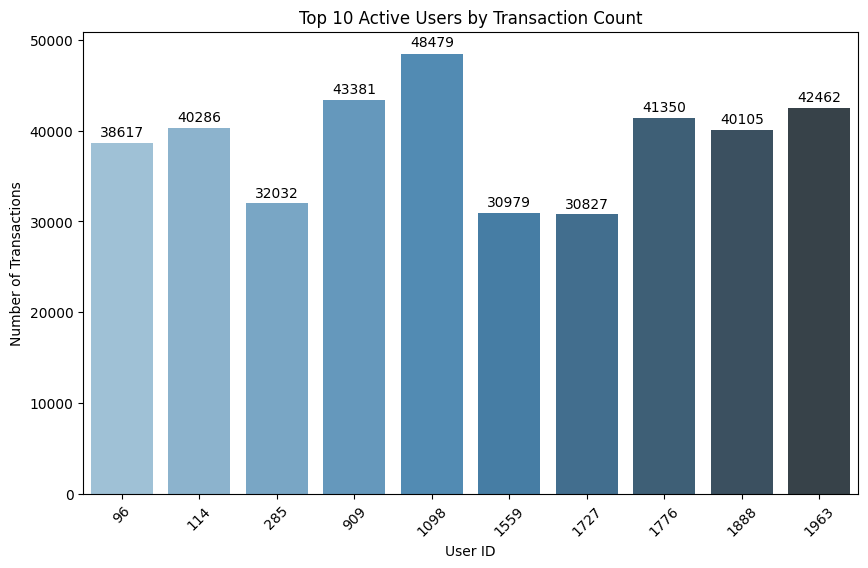

In [126]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=top_active_df, x="user_id", y="no_of_txns", palette="Blues_d")

# counts on top of each bar
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,   # center of bar
        p.get_height() + 0.01*p.get_height(),  # just above bar
        int(p.get_height()),             # value to display
        ha="center", va="bottom", fontsize=10
    )

plt.xticks(rotation=45)
plt.title("Top 10 Active Users by Transaction Count")
plt.xlabel("User ID")
plt.ylabel("Number of Transactions")
plt.show()


In [129]:
top_spenders = (
    master_df.groupby("user_id")["amount"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
    .rename(columns={"amount": "total_spent"})
)

top_spenders

user_id  total_spent
0       96 2,445,773.25
1     1686 2,167,880.90
2     1340 2,039,921.23
3      840 1,956,340.84
4      464 1,882,901.35
5      490 1,711,482.69
6      704 1,635,022.05
7      285 1,615,458.99
8      488 1,611,114.42
9     1168 1,590,822.75

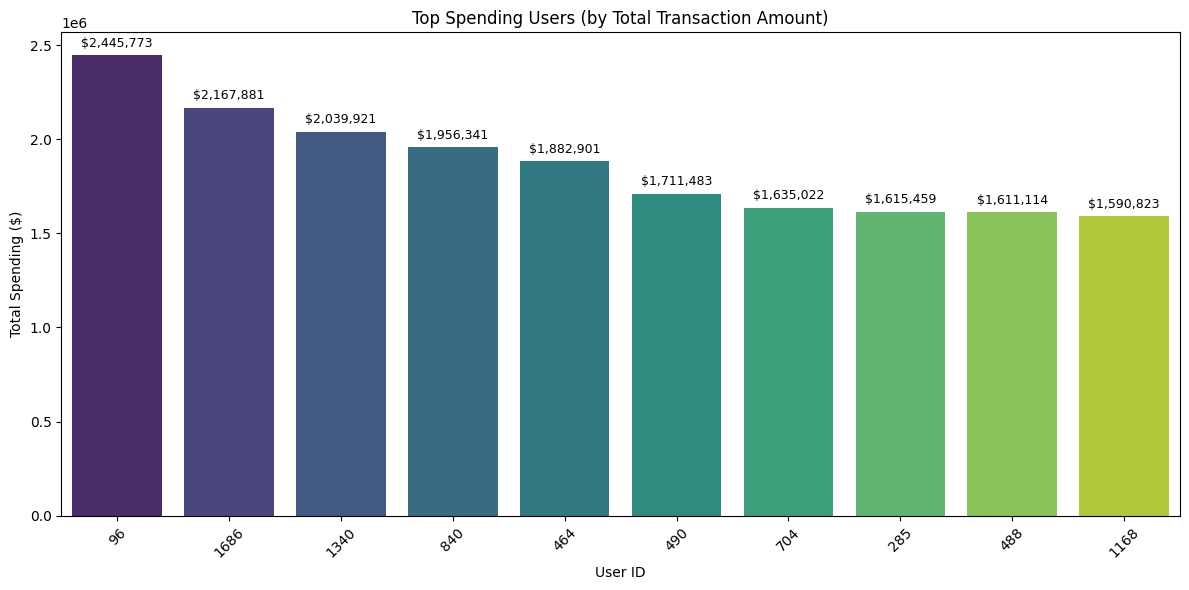

In [ ]:
# plot
plt.figure(figsize=(12,6))
ax = sns.barplot(
    x="user_id",
    y="total_spent",
    data=top_spenders,
    palette="viridis",
    order=top_spenders["user_id"]   # ensure seaborn uses the same order
)

ax.set_title("Top Spending Users (by Total Transaction Amount)")
ax.set_xlabel("User ID")
ax.set_ylabel("Total Spending ($)")

# Annotate using the actual bar patches so positions are correct
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"${height:,.0f}",                        # formatted label
        (p.get_x() + p.get_width() / 2, height),  # position: center-top of bar
        ha="center",
        va="bottom",
        xytext=(0, 4),                            # offset the text 4 points above the bar
        textcoords="offset points",
        fontsize=9
    )

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### insight: These are the most active users by number of txns & most spending users, retention of these users is essential for several reasons

In [130]:
# Compute percentiles
low_thresh = user_txn_counts.quantile(0.25)   # 25th percentile
high_thresh = user_txn_counts.quantile(0.75)  # 75th percentile

# Define groups
inactive_users = user_txn_counts[user_txn_counts <= low_thresh].index
active_users   = user_txn_counts[user_txn_counts >= high_thresh].index


print(f"Inactive users (bottom 25%): {len(inactive_users)} | Active users (top 25%): {len(active_users)}")

Inactive users (bottom 25%): 305 | Active users (top 25%): 305


In [132]:
# pulling demos

active_demo = master_df[master_df["user_id"].isin(active_users)][
    ["user_id", "current_age", "gender", "merchant_state", "yearly_income"]
].drop_duplicates("user_id")

inactive_demo = master_df[master_df["user_id"].isin(inactive_users)][
    ["user_id", "current_age", "gender", "merchant_state", "yearly_income"]
].drop_duplicates("user_id")


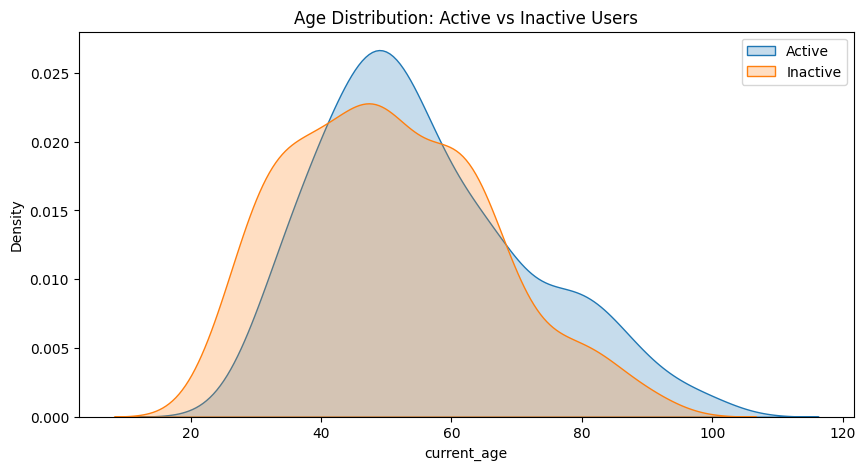

Active gender split:
 gender
Male     0.50
Female   0.50
Name: proportion, dtype: float64
Inactive gender split:
 gender
Female   0.51
Male     0.49
Name: proportion, dtype: float64


In [133]:
# Age comparison
plt.figure(figsize=(10,5))
sns.kdeplot(active_demo["current_age"], label="Active", fill=True)
sns.kdeplot(inactive_demo["current_age"], label="Inactive", fill=True)
plt.legend()
plt.title("Age Distribution: Active vs Inactive Users")
plt.show()

# Gender comparison
print("Active gender split:\n", active_demo["gender"].value_counts(normalize=True))
print("Inactive gender split:\n", inactive_demo["gender"].value_counts(normalize=True))


In [138]:
user_demo = users_df[['id', 'per_capita_income', 'yearly_income']]  
merged = user_txn_counts.reset_index().merge(user_demo, left_on='user_id', right_on='id')

In [ ]:
active_locations = master_df[master_df['id'].isin(active_users)].groupby('merchant_state').size()
inactive_locations = master_df[master_df['id'].isin(inactive_users)].groupby('merchant_state').size()

In [143]:
state_totals = master_df.groupby('merchant_state').size()
engagement_rate = (active_locations / state_totals).sort_values(ascending=False)


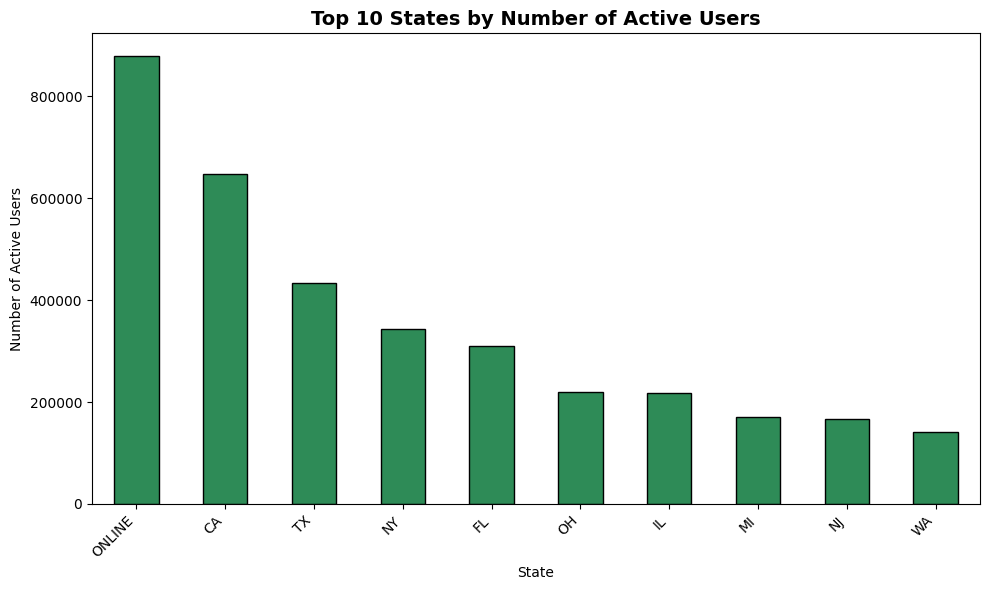

In [146]:
# Mark users as Active/Inactive
master_df['group'] = master_df['id'].apply(
    lambda x: 'Active' if x in active_users else ('Inactive' if x in inactive_users else 'Other')
)

# Count active users per state
active_counts = master_df[master_df['group'] == 'Active'].groupby('merchant_state').size()
total_counts = master_df.groupby('merchant_state').size()

# --- Bar Plot: Top 10 States by Number of Active Users ---
top_states_count = active_counts.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_states_count.plot(kind='bar', color='seagreen', edgecolor='black')
plt.title("Top 10 States by Number of Active Users", fontsize=14, weight='bold')
plt.ylabel("Number of Active Users")
plt.xlabel("State")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [147]:
# analysing time patterns in transactions
master_df["day_of_week"] = master_df["transaction_date"].dt.dayofweek
master_df["day_name"] = master_df["transaction_date"].dt.day_name()
master_df["hour"] = master_df["transaction_date"].dt.hour

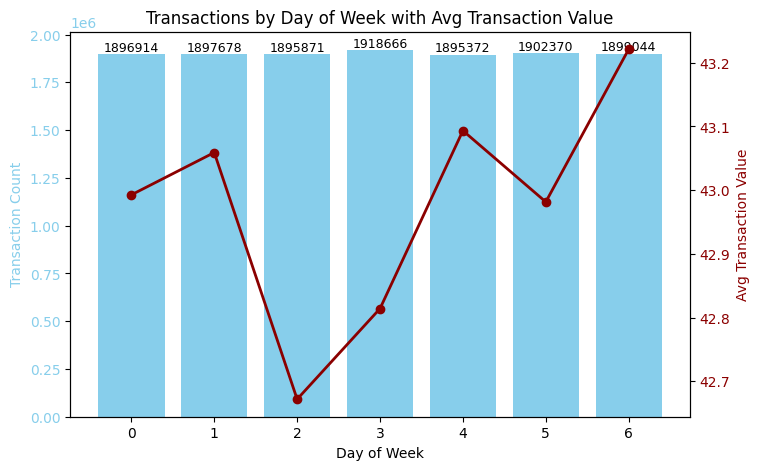

In [158]:
# Group by day of week
day_stats = master_df.groupby("day_of_week").agg(
    txn_count=("user_id", "count"),
    avg_value=("amount", "mean")
)

fig, ax1 = plt.subplots(figsize=(8,5))

# Bar plot for counts
bars = ax1.bar(day_stats.index, day_stats["txn_count"], color="skyblue")
ax1.set_xlabel("Day of Week")
ax1.set_ylabel("Transaction Count", color="skyblue")
ax1.tick_params(axis="y", labelcolor="skyblue")
ax1.set_title("Transactions by Day of Week with Avg Transaction Value")

# Add counts on top of bars
for bar in bars:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{int(height)}",
        ha="center", va="bottom", fontsize=9
    )

# Line plot for avg transaction value
ax2 = ax1.twinx()
ax2.plot(day_stats.index, day_stats["avg_value"], color="darkred", marker="o", linewidth=2)
ax2.set_ylabel("Avg Transaction Value", color="darkred")
ax2.tick_params(axis="y", labelcolor="darkred")

plt.show()

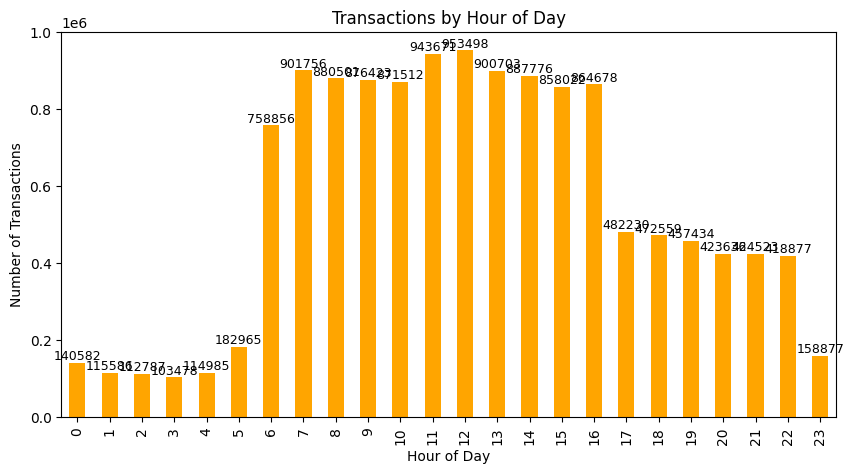

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
bars = hour_counts.plot(kind="bar", color="orange", ax=ax)

ax.set_title("Transactions by Hour of Day")
ax.set_ylabel("Number of Transactions")
ax.set_xlabel("Hour of Day")
ax.set_xticks(range(0,24))
ax.set_xticklabels(range(0,24))

# Add counts on top of bars
for bar in bars.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{int(height)}",
        ha="center", va="bottom", fontsize=9
    )

plt.show()

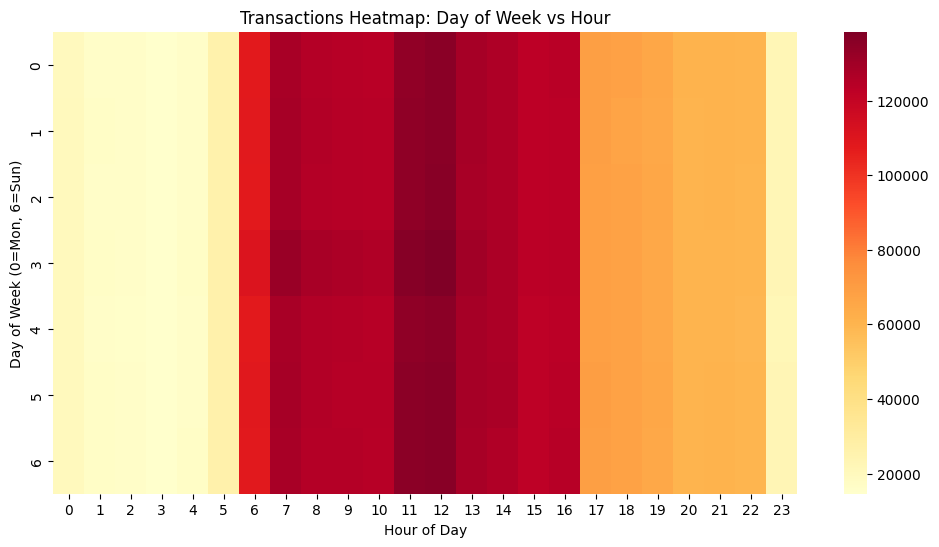

In [150]:
import seaborn as sns

heatmap_data = master_df.groupby(["day_of_week", "hour"]).size().unstack(fill_value=0)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap="YlOrRd")
plt.title("Transactions Heatmap: Day of Week vs Hour")
plt.ylabel("Day of Week (0=Mon, 6=Sun)")
plt.xlabel("Hour of Day")
plt.show()


In [170]:
# main causes of failed txns
failed_txns_df = master_df[~master_df["errors"].isin(["No Error"])].groupby("errors").size().sort_values(ascending=False).reset_index()

In [171]:
failed_txns_df.columns = ['errors', 'count']
failed_txns_df

errors   count
0                                Insufficient Balance  130902
1                                             Bad PIN   32119
2                                    Technical Glitch   26271
3                                     Bad Card Number    7767
4                                      Bad Expiration    6161
5                                             Bad CVV    6106
6                                         Bad Zipcode    1126
7                        Bad PIN,Insufficient Balance     293
8               Insufficient Balance,Technical Glitch     243
9                Bad Card Number,Insufficient Balance      71
10                           Bad PIN,Technical Glitch      70
11                       Bad CVV,Insufficient Balance      57
12                Bad Expiration,Insufficient Balance      47
13                            Bad Card Number,Bad CVV      38
14                     Bad Card Number,Bad Expiration      33
15                             Bad Expiration,Bad CVV      32
16                    Bad Expiration,Technical Glitch      21
17                   Bad Card Number,Technical Glitch      15
18                           Bad CVV,Technical Glitch       8
19                   Bad Zipcode,Insufficient Balance       7
20                       Bad Zipcode,Technical Glitch       5
21  Bad Card Number,Bad Expiration,Insufficient Ba...       1

In [173]:
failed_txns_amount_df = master_df[~master_df["errors"].isin(["No Error"])].groupby("errors")["amount"].sum().sort_values(ascending=False).reset_index()
failed_txns_amount_df

errors       amount
0                                Insufficient Balance 8,910,062.00
1                                             Bad PIN 1,280,652.65
2                                    Technical Glitch 1,183,549.14
3                                     Bad Card Number   460,217.13
4                                             Bad CVV   377,380.82
5                                      Bad Expiration   361,613.05
6                                         Bad Zipcode    38,101.74
7                        Bad PIN,Insufficient Balance    20,041.87
8               Insufficient Balance,Technical Glitch    18,693.16
9                            Bad PIN,Technical Glitch     7,061.03
10               Bad Card Number,Insufficient Balance     6,239.75
11                       Bad CVV,Insufficient Balance     4,377.13
12                Bad Expiration,Insufficient Balance     3,391.91
13                            Bad Card Number,Bad CVV     2,068.01
14                             Bad Expiration,Bad CVV     1,862.91
15                     Bad Card Number,Bad Expiration     1,252.95
16                   Bad Zipcode,Insufficient Balance     1,104.81
17                    Bad Expiration,Technical Glitch       926.18
18                           Bad CVV,Technical Glitch       865.07
19                   Bad Card Number,Technical Glitch       614.59
20                       Bad Zipcode,Technical Glitch       159.71
21  Bad Card Number,Bad Expiration,Insufficient Ba...        61.94

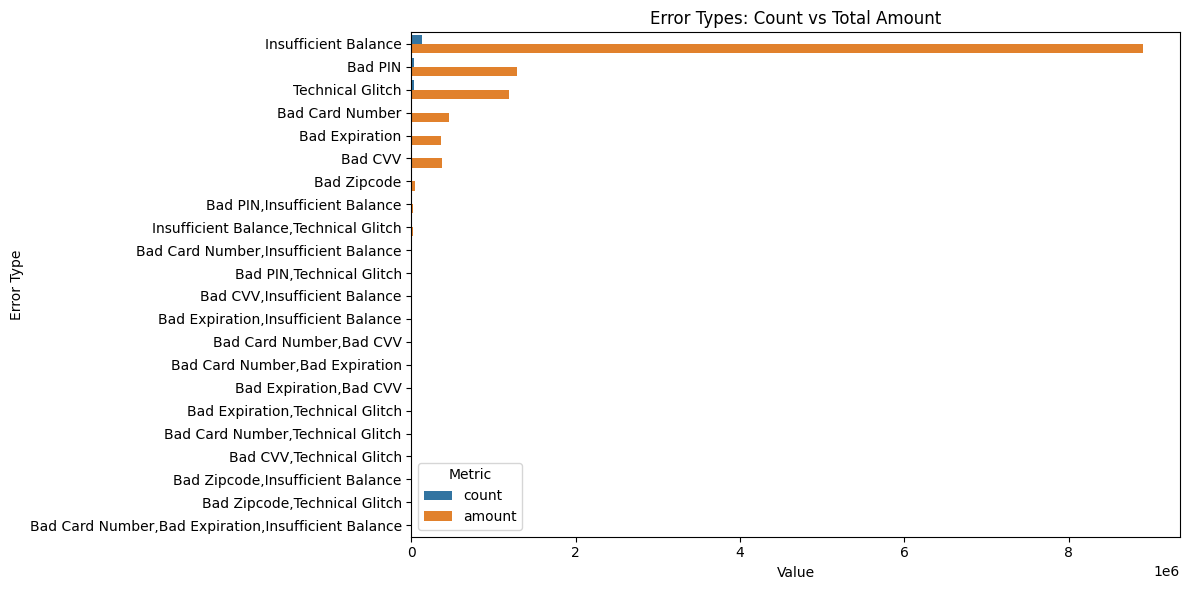

In [178]:
merged_errors_df = failed_txns_df.merge(failed_txns_amount_df, on="errors", how='left')
# Melt to long format for Seaborn
plot_df = merged_errors_df.melt(id_vars="errors", value_vars=["count", "amount"], var_name="Metric", value_name="Value")

plt.figure(figsize=(12, 6))
sns.barplot(data=plot_df, y="errors", x="Value", hue="Metric")
plt.title("Error Types: Count vs Total Amount")
plt.xlabel("Value")
plt.ylabel("Error Type")
plt.tight_layout()
plt.show()

In [201]:
# What is the geographic distribution of fraudulent transactions over the years?
master_df['transaction_year'] = master_df['transaction_date'].dt.year
fraud_txns_df_geo = master_df[master_df['fraud_label'] == True]

agg_fraud_txns_df_geo = (
    fraud_txns_df_geo
    .groupby(['merchant_state', 'transaction_year'])
    .size()
    .sort_values(ascending=False)
    .reset_index(name='fraud_count')
)

In [202]:
agg_fraud_txns_df_geo

merchant_state  transaction_year  fraud_count
0           ONLINE              2010         2317
1           ONLINE              2016         2096
2           ONLINE              2015         1864
3            Italy              2018         1529
4            Italy              2019         1360
5           ONLINE              2013         1127
6           ONLINE              2012          693
7           ONLINE              2014          562
8            Haiti              2010          251
9            Italy              2017          172
10              OH              2013          162
11              OH              2014           91
12          ONLINE              2018           85
13              CA              2015           48
14              CA              2016           47
15          ONLINE              2011           35
16              TX              2016           35
17              CA              2012           30
18              TX              2015           26
19              OH              2016           26
20              NY              2016           26
21              FL              2012           23
22              PA              2012           22
23              NJ              2016           18
24              IN              2015           18
25              NJ              2015           18
26              NY              2015           18
27              FL              2016           17
28              FL              2015           17
29              MI              2016           16
30              OH              2018           15
31              NC              2012           14
32              NC              2015           14
33              MO              2013           14
34              VA              2016           13
35              NY              2012           13
36              NC              2016           13
37              TX              2012           13
38              IL              2016           12
39              MI              2015           12
40              OH              2012           12
41              SC              2015           12
42              IL              2015           12
43              IA              2013           12
44              IL              2012           11
45              IA              2014           10
46              OH              2015           10
47              MI              2012           10
48              MO              2016           10
49              OK              2015           10
50              GA              2016            9
51              MS              2012            9
52              WA              2016            9
53              MA              2016            8
54              CO              2016            8
55              IN              2016            8
56              MN              2015            8
57              MD              2012            7
58              GA              2015            7
59              IA              2015            7
60              WA              2012            7
61              AZ              2015            7
62              SD              2016            7
63              VA              2015            7
64              AL              2012            6
65              VA              2012            6
66              NJ              2012            6
67              AL              2015            6
68              PA              2016            6
69              MO              2015            6
70              GA              2012            6
71              FL              2013            6
72              KY              2016            6
73              AL              2016            6
74              MD              2016            5
75              WI              2015            5
76              WI              2016            5
77              TN              2015            5
78              WA              2015            5
79  

In [224]:
# What is the fraud rate by each card type?, Do certain card types have higher fraud rates?
master_df['fraud_label'] = master_df['fraud_label'].astype(bool)
fraud_rate_by_card_type_df = (master_df.groupby('card_type')['fraud_label'].mean().mul(100).round(5).sort_values(ascending=False).reset_index(name='fraud_rate_percentage'))

In [225]:
fraud_rate_by_card_type_df

card_type  fraud_rate_percentage
0  Debit (Prepaid)                   0.15
1           Credit                   0.11
2            Debit                   0.09

In [240]:
# How does different transaction processes correlate with fraud (swipe, or chip)?,
# Does having a chip on the card help with fraud prevention/detection?


use_chip_df = (
    master_df[master_df['fraud_label']]
    .groupby('use_chip')['fraud_label']
    .size()
    .reset_index(name='fraud_count')
    .sort_values(by='fraud_count', ascending=False)
)


In [241]:
use_chip_df

use_chip  fraud_count
1  Online Transaction         8779
0    Chip Transaction         3176
2   Swipe Transaction         1377

In [249]:
fraud_rate_by_use_chip_df = (
    master_df
    .groupby('use_chip')['fraud_label']
    .mean()                      # fraud_label is bool, so this gives fraud rate
    .mul(100)
    .round(2)
    .reset_index(name='fraud_rate_percent')
    .sort_values(by='fraud_rate_percent', ascending=False)
)
fraud_rate_by_use_chip_df

use_chip  fraud_rate_percent
1  Online Transaction                0.56
0    Chip Transaction                0.07
2   Swipe Transaction                0.02

### insight: the use of a chip does indeed help lower the rate of fraud in transactions, however, online transactions are generally used more than chip or swipe transactions; the same can be said for swipe transactions as they are not really common nowadays and are, therefore, not as targeted. 

In [ ]:
# Is fraud concentrated among specific users?

fraud_by_user = (
    master_df[master_df['fraud_label']]
    .groupby('id')   
    .size()            
    .sort_values(ascending=False)
    .reset_index(name='fraud_txn_count')
)

top_fraud_users = fraud_by_user.head(20)

In [260]:
total_fraud = fraud_by_user['fraud_txn_count'].sum()
top_fraud_sum = top_fraud_users['fraud_txn_count'].sum()
percent_top_users = (top_fraud_sum / total_fraud) * 100
print(f"Top 20 users account for {percent_top_users:.2f}% of all fraud transactions")


Top 20 users account for 6.22% of all fraud transactions


### insight: fraud in this dataset is fairly dispersed across many users, with the top 20 users accounting for only a small fraction (6.22%) of all fraud transactions, indicating the need for broad fraud prevention strategies rather than focusing on a few high-risk individuals.

In [ ]:
cols_to_drop = ['mcc', 'zip', 'num_credit_cards', 'id', 'card_number', 'expires', 'has_chip', 'num_cards_issued']
final_master_df = master_df.drop(columns=cols_to_drop)

In [264]:
final_master_df.head(10)

transaction_id    transaction_date  user_id  card_id  amount  \
0       15113549 2014-10-15 08:34:00      520     5104   35.04   
1       15113550 2014-10-15 08:34:00      727     4698    2.76   
2       15113552 2014-10-15 08:35:00      247     2179  112.92   
3       15113554 2014-10-15 08:35:00      534     3986   18.75   
4       15113555 2014-10-15 08:35:00     1096     5225   20.71   
5       15113557 2014-10-15 08:36:00      135     2808   31.89   
6       15113558 2014-10-15 08:36:00      623     2130 -364.00   
7       15113559 2014-10-15 08:36:00     1127     4641   14.68   
8       15113561 2014-10-15 08:37:00      277     4264    2.67   
9       15113562 2014-10-15 08:37:00      432     4301   67.00   

             use_chip merchant_id merchant_city merchant_state    errors  \
0   Swipe Transaction       34490        Newark             DE  No Error   
1   Swipe Transaction       59935   Saint Louis             MO  No Error   
2   Swipe Transaction       38602  Lake Charles             LA  No Error   
3   Swipe Transaction       83271        Grimes             IA  No Error   
4   Swipe Transaction       50783      Syracuse             NY  No Error   
5  Online Transaction       39021        Online         ONLINE  No Error   
6   Swipe Transaction       51300    Wilmington             DE  No Error   
7   Swipe Transaction       50783        Naples             FL  No Error   
8   Swipe Transaction       61195       Grenada             MS  No Error   
9   Swipe Transaction       22204        Newton             NC  No Error   

                           mcc_category  fraud_label  current_age  \
0  Miscellaneous Home Furnishing Stores        False           45   
1             Miscellaneous Food Stores        False           44   
2                     Department Stores        False           49   
3   Motor Freight Carriers and Trucking        False           27   
4          Grocery Stores, Supermarkets        False           59   
5                 Tolls and Bridge Fees        False           64   
6           Non-Ferrous Metal Foundries        False           63   
7          Grocery Stores, Supermarkets        False           59   
8                      Service Stations        False           46   
9                      Service Stations        False           55   

   retirement_age  birth_year  birth_month  gender                   address  \
0              66        1974            4    Male      3346 Hillside Street   
1              68        1975            5    Male     310 Bayview Boulevard   
2              69        1970            7  Female            704 East Drive   
3              74        1993            2  Female    31919 Summit Boulevard   
4              67        1960           10    Male       1089 Norfolk Avenue   
5              69        1955            6  Female   327 Lafayette Boulevard   
6              60        1956            4    Male            3283 Park Lane   
7              70        1960            8    Male          60396 Elm Street   
8              68        1974            2    Male         2292 South Street   
9              64        1964           11  Female  4329 El Camino Boulevard   

   latitude  longitude  per_capita_income  yearly_income  total_debt  \
0     40.26     -75.74          28,278.00      57,658.00   74,288.00   
1     38.63     -90.24          19,874.00      40,522.00   81,572.00   
2     30.21     -93.20          26,772.00      54,587.00   69,070.00   
3     41.72     -93.60          29,680.00      60,510.00   23,196.00   
4     43.04     -76.14          20,294.00      41,379.00   95,988.00   
5     39.72     -82.59          18,680.00      38,088.00   51,679.00   
6     41.53     -87.87          32,083.00      77,961.00   39,811.00   
7     26.14     -81.79          17,455.00      35,590.00   92,603.00   
8     33.77     -89.81          15,568.00      31,739.00   81,905.00   
9     36.08     -81.92          13,018.00      26,546.00   32,087.00   

   c

In [267]:
# exporting the final file
final_master_df.to_csv("D:\misc\master_data.csv", index=False)